In [24]:
import os
import sys
sys.path.append('..')

from scripts.data_loaders import *
from scripts.data_cleaning import *
from scripts.eda_utils import *
from scripts.visualizations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
file_path = r"../data/MachineLearningRating_v3.txt"
raw_df = load_data(file_path, sep='|')
raw_df.shape

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\data_loaders.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(file_path, sep='|')


Finished loading data.
Data loaded successfully.


(1000098, 52)

In [5]:
# Summarize data
summarize_data(raw_df)


--- Data Summary ---
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000   

In [7]:
cleaned_df = clean_data(raw_df)
df = cleaned_df
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [26]:
# Check for missing values
missing_summary = missing_values_summary(df)
missing_summary

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
Rebuilt                     64.183810
Converted                   64.183810
WrittenOff                  64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
NumberOfDoors                0.055195
VehicleType                  0.055195
kilowatts                    0.055195
cubiccapacity                0.055195
Cylinders                    0.055195
Model                        0.055195
make                         0.055195
VehicleIntroDate             0.055195
bodytype                     0.055195
mmcode                       0.055195
CapitalOutstanding           0.000200
Name: Missing (%), dtype: float64

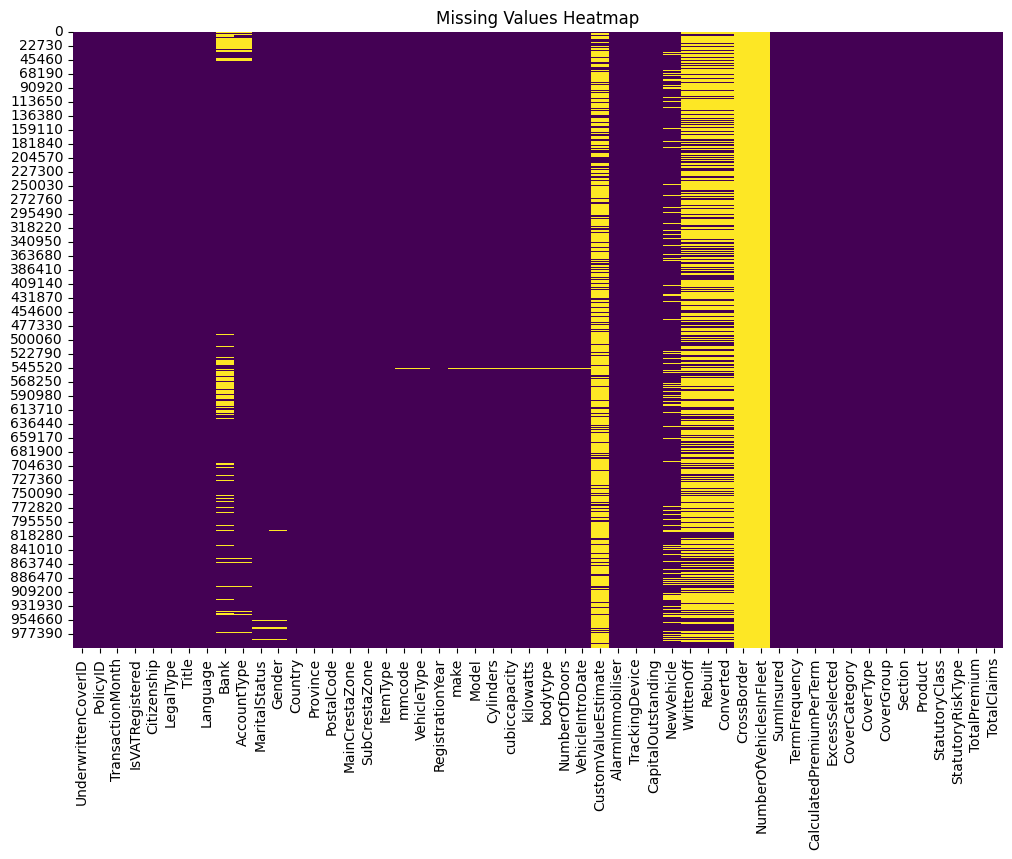

In [27]:
plot_missing_values(df)

In [28]:
# Validate data types
validate_data_types(df)

Columns needing attention:

IsVATRegistered: Unexpected data type: bool
Citizenship: Likely categorical with 4 levels.
LegalType: Likely categorical with 6 levels.
Title: Likely categorical with 5 levels.
Language: Likely categorical with 1 levels.
Bank: Likely categorical with 11 levels.
AccountType: Likely categorical with 3 levels.
MaritalStatus: Likely categorical with 3 levels.
Gender: Likely categorical with 3 levels.
Country: Likely categorical with 1 levels.
Province: Likely categorical with 9 levels.
MainCrestaZone: Likely categorical with 16 levels.
SubCrestaZone: Likely categorical with 45 levels.
ItemType: Likely categorical with 1 levels.
VehicleType: Likely categorical with 5 levels.
make: Likely categorical with 42 levels.
Model: Likely categorical with 409 levels.
bodytype: Likely categorical with 13 levels.
VehicleIntroDate: Likely categorical with 174 levels.
AlarmImmobiliser: Likely categorical with 2 levels.
TrackingDevice: Likely categorical with 2 levels.
CapitalO

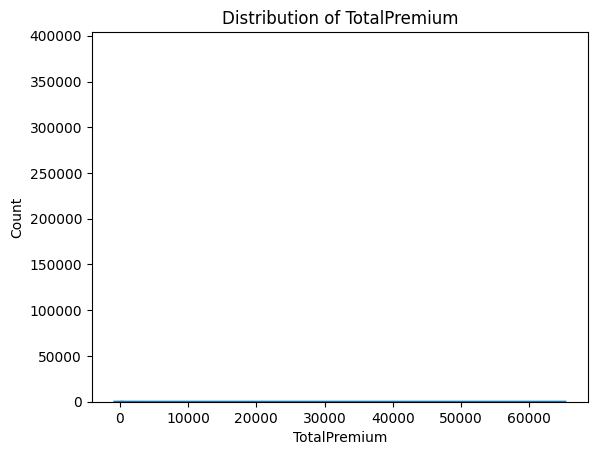

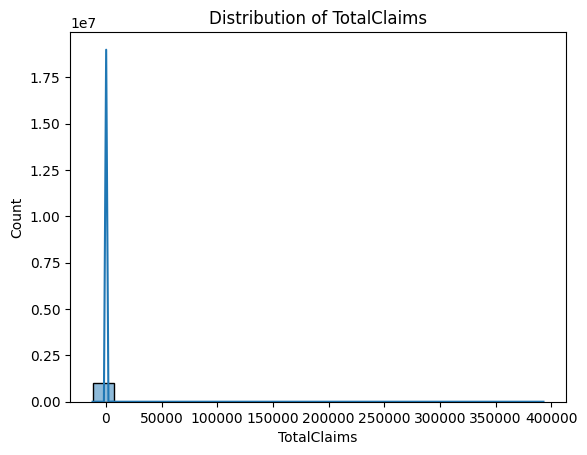

In [8]:
# Univariate Analysis for Numerical columns
num_cols = ['TotalPremium', 'TotalClaims']
for col in num_cols:
    plot_distribution(df, col)

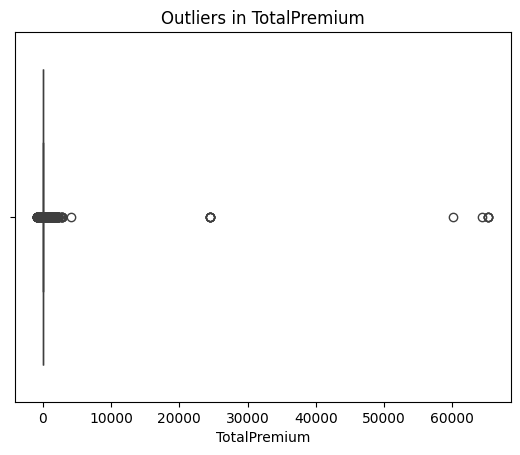

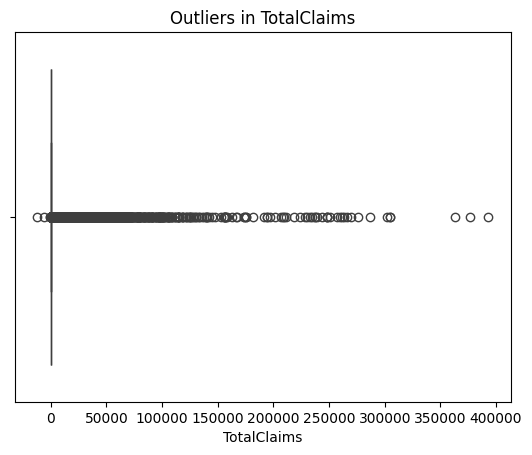

In [9]:
# Outlier Detection
for col in num_cols:
    plot_outliers(df, col)

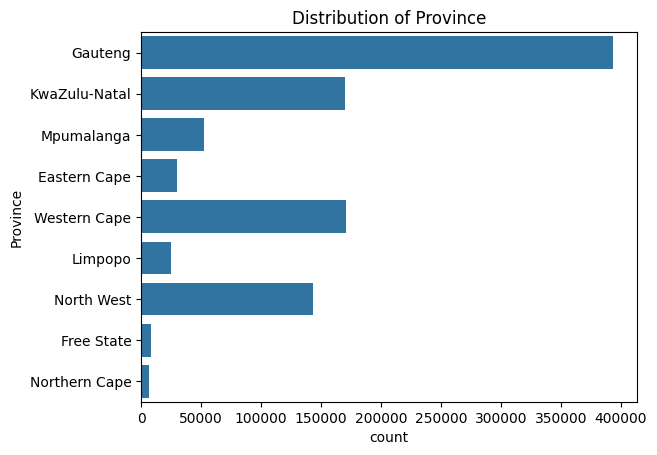

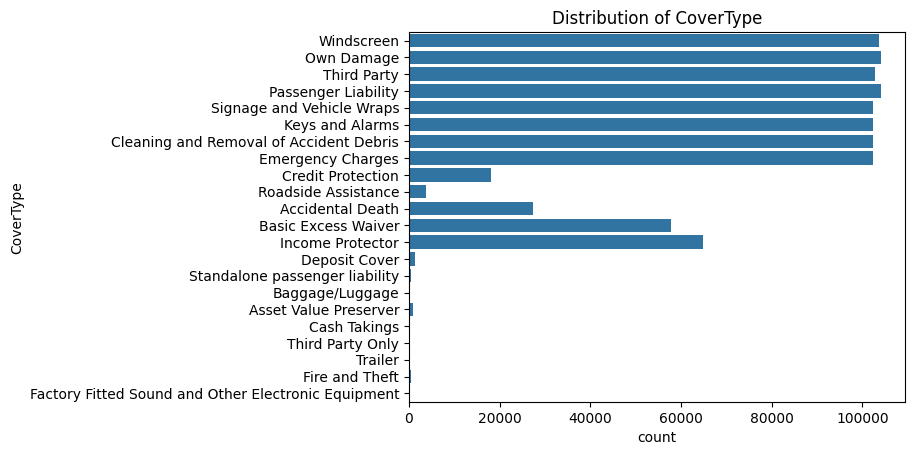

In [17]:
# Categorical columns
cat_cols = ['Province', 'CoverType']
for col in cat_cols:
    plot_counts(df, col)

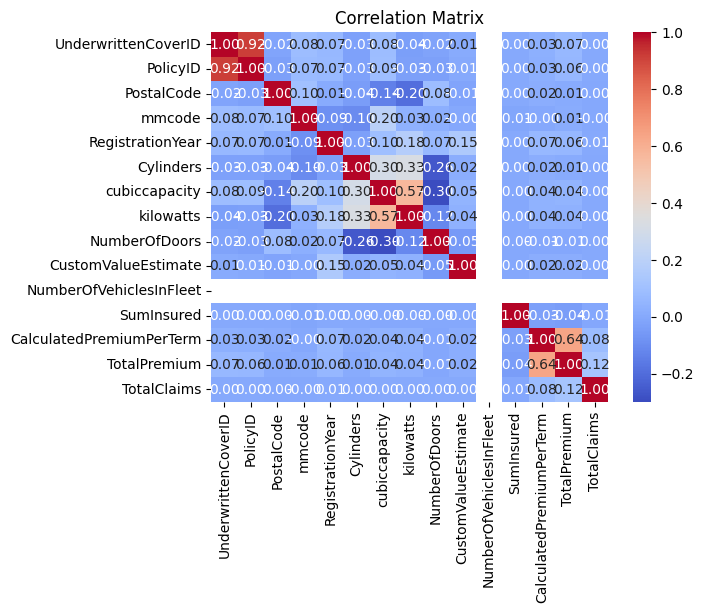

In [20]:
# Correlation Matrix
correlation_matrix(df)

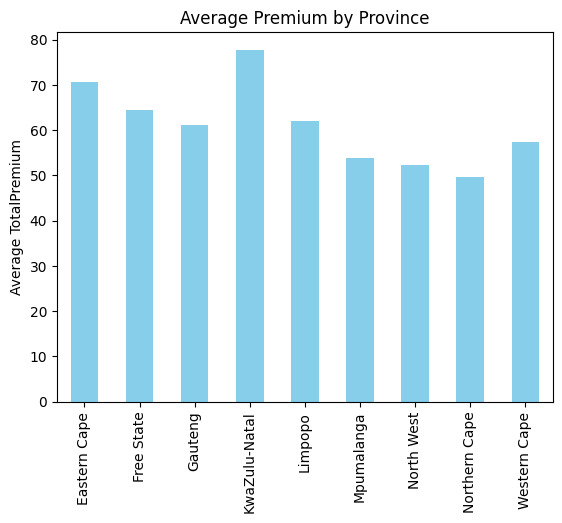

In [13]:
# Trends by Geography
bar_plot(data=df, group_col="Province", value_col="TotalPremium", title="Average Premium by Province", ylabel="Average TotalPremium", xlabel="")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\visualizations.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



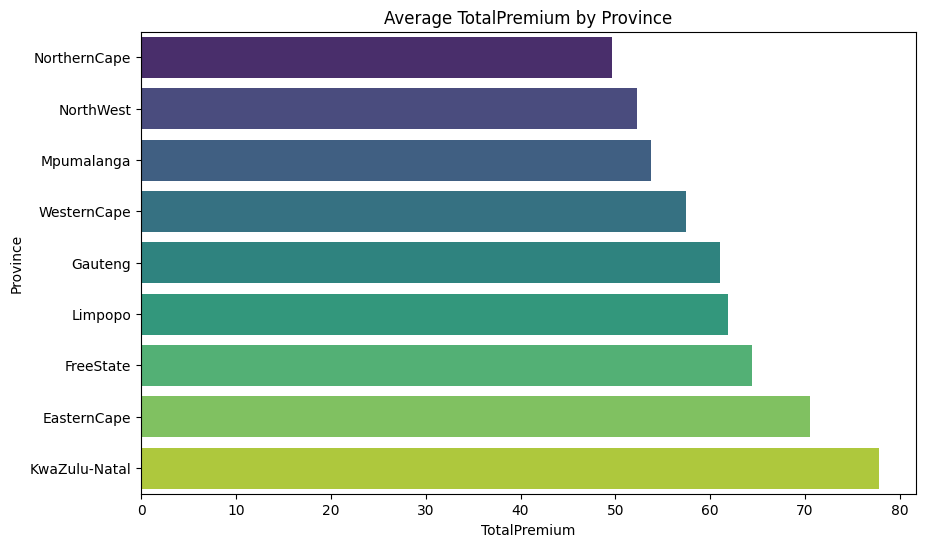

In [29]:
# Perform geographic trend analysis
geographic_analysis(df, "Province", "TotalPremium")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-3\notebook\..\scripts\visualizations.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



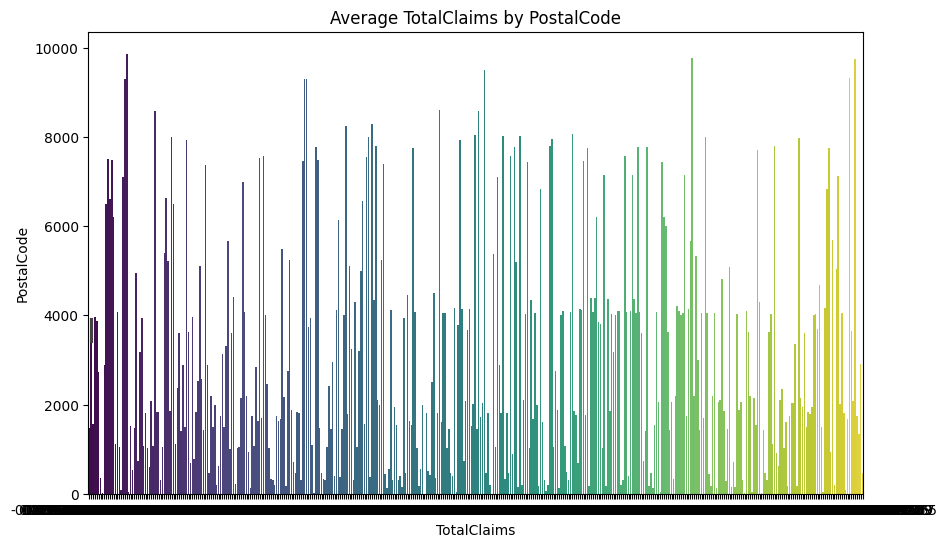

In [30]:
geographic_analysis(df, "PostalCode", "TotalClaims")

C:\Users\Darkles\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


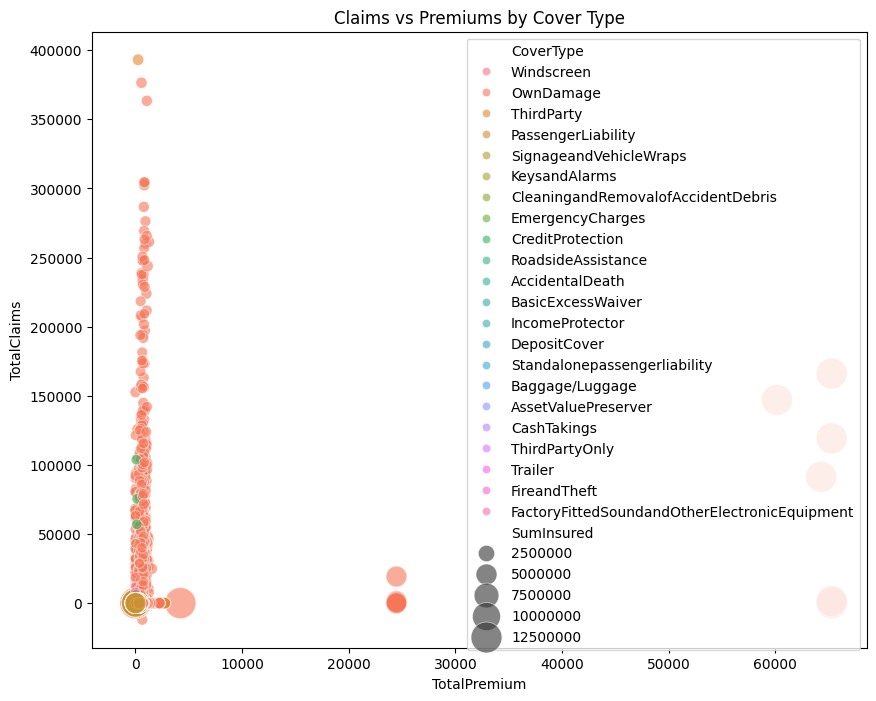

In [31]:
# Creative visualization (Bubble Chart)
bubble_chart(df, "TotalPremium", "TotalClaims", size="SumInsured", hue="CoverType", title="Claims vs Premiums by Cover Type")

In [33]:
output_path = r'../data/AlphaCare_Risk_Insurance_data.csv'
df.to_csv(output_path, index=False)